# Intro to timeseries and date handling in matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter

## Basic example

### Create dataframe

In [3]:
dates = pd.date_range(start='2024-01-01', periods=200)
values = np.random.rand(200).cumsum()

data = pd.DataFrame({'Date': dates, 'Value': values})
data

,Date,Value
0,2024-01-01,0.982447
1,2024-01-02,1.338841
2,2024-01-03,1.963794
3,2024-01-04,2.217349
4,2024-01-05,2.591271
...,...,...
195,2024-07-14,93.777489
196,2024-07-15,94.371830
197,2024-07-16,95.253561
198,2024-07-17,95.990372


### Plot timeseries

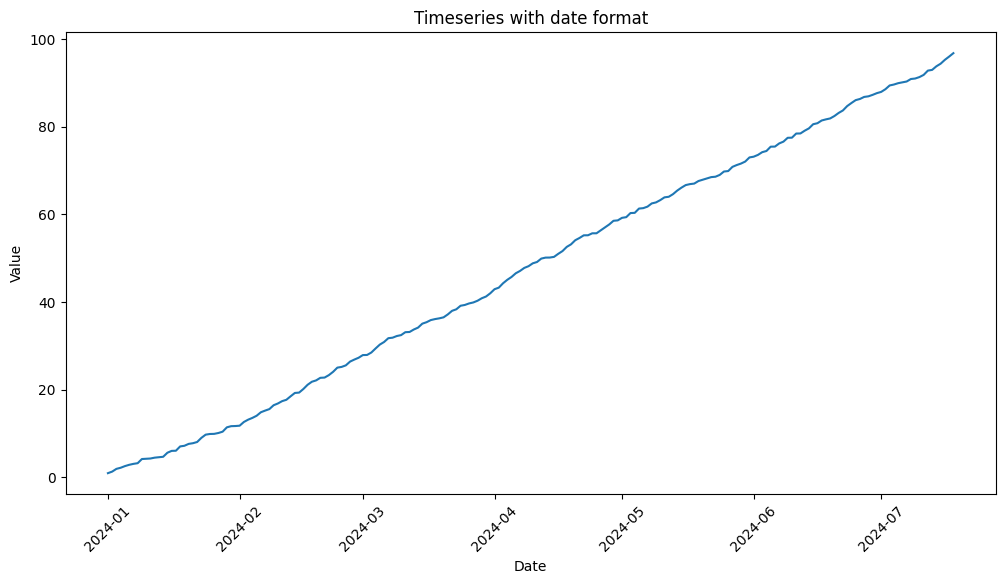

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data['Date'], data['Value'])

plt.xticks(rotation=45)

plt.title('Timeseries with date format')
plt.xlabel('Date')
plt.ylabel('Value')

plt.show()

## Timeseries: working with data

### Import dataset

In [11]:
import os

# Get the absolute path to the current notebook
os_path = os.getcwd()
# Add the extra path to the dataset file
dataset_path = os_path+'\datasets\Online_Retail.csv'
sales_data = pd.read_csv(dataset_path, encoding='ISO-8859-1')
sales_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Print columns datatypes

In [12]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Convert Dates column into a datetype

In [13]:
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'], format='%m/%d/%y %H:%M')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Set the dates column as the main index

In [14]:
sales_data.set_index('InvoiceDate', inplace=True)
sales_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France


### Add a new column: `TotalPrice`

In [15]:
sales_data['TotalPrice'] = sales_data['UnitPrice'] * sales_data['Quantity']
sales_data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
2011-12-09 12:50:00,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20
2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60


In [19]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
 7   TotalPrice   541909 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 37.2+ MB
None


### Plot per individual sale

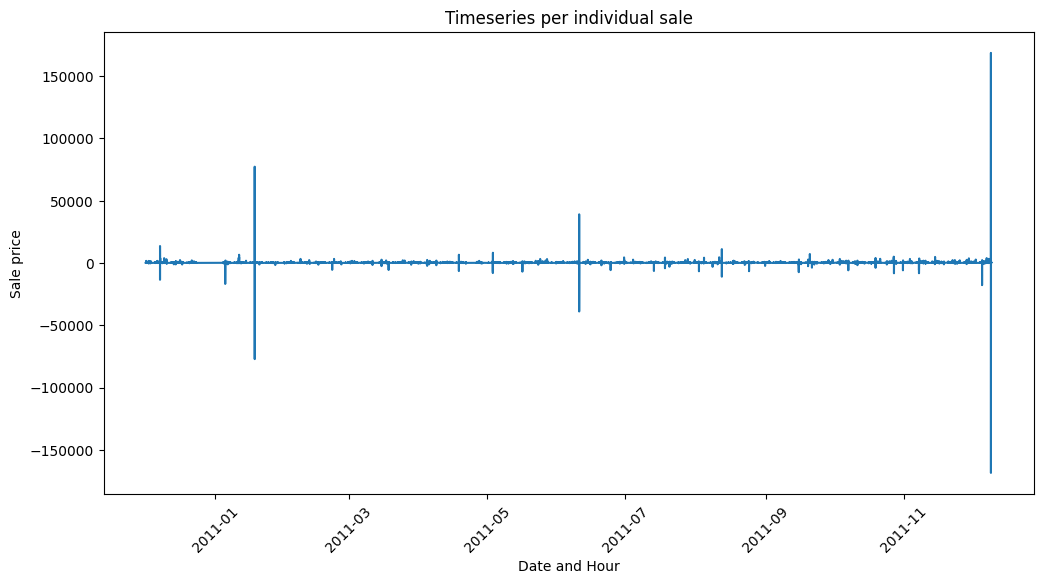

In [20]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(sales_data.index, sales_data['TotalPrice'])

plt.xticks(rotation=45)

plt.title('Timeseries per individual sale')
plt.xlabel('Date and Hour')
plt.ylabel('Sale price')

plt.show()

### Plot per month

In [22]:
# resample per month
sales_resample_month = sales_data.resample('ME').agg({
    'TotalPrice': 'sum'
})

sales_resample_month

,TotalPrice
InvoiceDate,
2010-12-31,748957.020
2011-01-31,560000.260
2011-02-28,498062.650
2011-03-31,683267.080
2011-04-30,493207.121
2011-05-31,723333.510
2011-06-30,691123.120
2011-07-31,681300.111
2011-08-31,682680.510


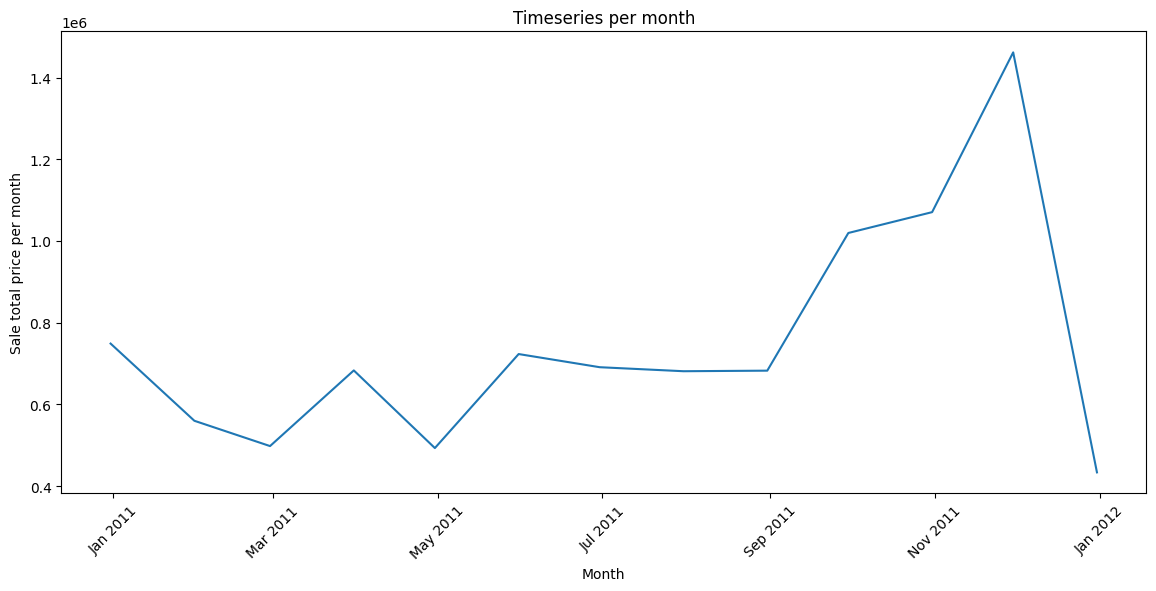

In [29]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(sales_resample_month.index, sales_resample_month['TotalPrice'])

# Formst string for the date
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.title('Timeseries per month')
plt.xlabel('Month')
plt.ylabel('Sale total price per month')

plt.show()

### Plot per day

In [24]:
# resample per day
sales_resample_day = sales_data.resample('D').agg({
    'TotalPrice': 'sum'
})

sales_resample_day

,TotalPrice
InvoiceDate,
2010-12-01,58635.56
2010-12-02,46207.28
2010-12-03,45620.46
2010-12-04,0.00
2010-12-05,31383.95
...,...
2011-12-05,57751.32
2011-12-06,54228.37
2011-12-07,75076.22


Text(0, 0.5, 'Sale total price per day')

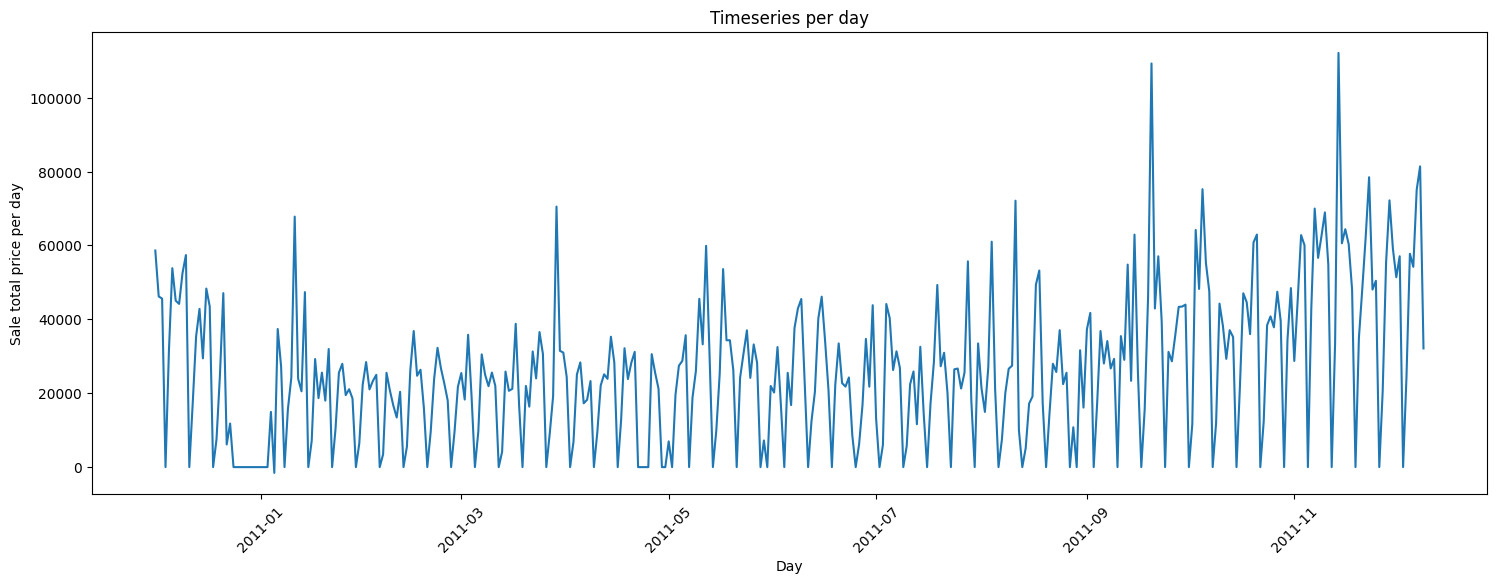

In [28]:
fig, ax = plt.subplots(figsize=(18,6))

ax.plot(sales_resample_day.index, sales_resample_day['TotalPrice'])

plt.xticks(rotation=45)

plt.title('Timeseries per day')
plt.xlabel('Day')
plt.ylabel('Sale total price per day')